# Correlation with Python

In this notebook we will go over an example of how to perform a correaltion analysis.

As usual we start by importing the data.

In [32]:
%reset
import pandas as pd
import numpy as np

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [66]:
X=pd.Series([2.1,2.5,3.6,4.0],name="Temp")
Y=pd.Series([8.0,10.0,12.0,14.0],name="Pressure")

C:\Users\nabil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Temperature')

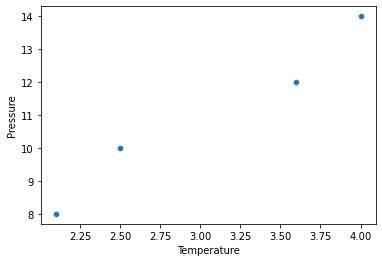

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(X,Y)
plt.ylabel("Pressure")
plt.xlabel("Temperature")

In [86]:
meanX=np.mean(X)
meanY=np.mean(Y)
print(meanX)
print(meanY)

3.05
11.0


Variance is the sum of the squared deviations from the mean divided by n-1 for the sample

In [87]:
VarianceX=(np.square(2.1-3.1)+np.square(2.5-3.1)+np.square(3.6-3.1)+np.square(4.0-3.1))/(4-1)
VarianceY=(np.square(8.0-11)+np.square(10-11)+np.square(12-11)+np.square(14-11))/(4-1)
print(VarianceX)
print(VarianceY)

0.8066666666666666
6.666666666666667


Covariance is the sum of the cross-products divided by n-1 for the sample

In [88]:
Covariance= ((2.1-3.1)*(8.0-11.0)+(2.5-3.1)*(10-11)+(3.6-3.1)*(12-11)+(4.0-3.1)*(14-11))/(4-1)
print(Covariance)

2.266666666666666


In python the covariance matrix can be found using np.cov, where the variances are the main diagonal and the covaraince is the other diagonal. 

In [89]:
np.cov(X,Y)

array([[0.80333333, 2.26666667],
       [2.26666667, 6.66666667]])

Correlation (Pearson's correlation coefficient = r) is the scaled covariance, and defines the co-relationship between the two variables or how linearly related they are to each other. It is equal to the covaraince divided by the product of the standard deviations. 

In [90]:
Pearsons_r= np.cov(X,Y) / (np.std(X,ddof=1)*(np.std(Y,ddof=1)))
print(Pearsons_r)

[[0.3471311  0.97945704]
 [0.97945704 2.88075601]]


In [91]:
np.corrcoef(X,Y)

array([[1.        , 0.97945704],
       [0.97945704, 1.        ]])

Scipy will provide the Pearson's r, and will return the correaltion coefficient and the p-value for testing non-correaltion. The p-value (2-sided) indicates the probability of an uncorrelated system producing datasets that have a r at least as extreme as the one computed from the data. For 2 values, you can find the test statistic as:

t = r$\sqrt{(n-2)/(1-r^2)}$
with n-2 DOF

In [92]:
from scipy import stats
stats.pearsonr(X,Y)

(0.9794570432566516, 0.020542956743348384)

In [93]:
t1=0.9795*np.sqrt((4-2)/(1-np.square(0.9795)))
print(t1)

6.876457364090153


In [94]:
stats.t.cdf(-6.8765,2)

0.01024987677730093

In [95]:
2*(stats.t.cdf(-6.97,2))

0.01996970307567085

For a non-normal distribution, the Spearman's correlation coefficient can be used to summarize the strength of the association between two variables.  You can use the Scipy stats call of spearmanr to compute this. A Spearmans correaltion of 1 results when there is a monotonic relationship between the variables, even if this relationship is not linear.  All data points with greater x values than that of a given point will have greater y values as well. The correaltion is applied to the rank varaibles.

In [96]:
stats.spearmanr(X,Y)

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [97]:
print(X)

0    2.1
1    2.5
2    3.6
3    4.0
Name: Temp, dtype: float64


In [98]:
print(Y)

0     8.0
1    10.0
2    12.0
3    14.0
Name: Pressure, dtype: float64


C:\Users\nabil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 49.99999999999995, 'Temperature')

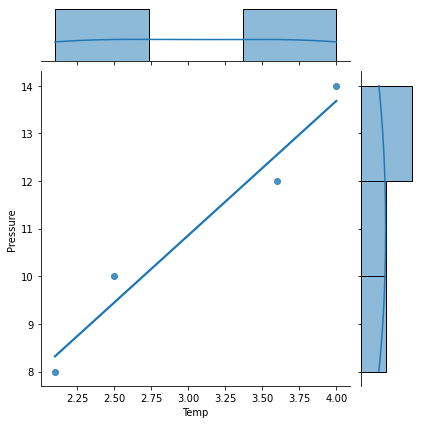

In [102]:
#regplot() plots data and a linear regression line or can use lmplot to help in conditioning on other variables
sns.jointplot(X,Y,kind="reg",ci=None)
plt.ylabel("Pressure")
plt.xlabel("Temperature")

Another Example: Percentage of children immunized against DPT and under 5 year old mortality rate for 20 countries in 1992.  

In [106]:
DPT = pd.read_excel('DPT.xlsx')
print(DPT)

                Nation  Percentage Immunized  \
0              Bolivia                    77   
1               Brazil                    69   
2             Cambodia                    32   
3               Canada                    85   
4                China                    94   
5       Czech Republic                    99   
6                Egypt                    89   
7             Ethiopia                    13   
8              Finland                    95   
9               France                    95   
10              Greece                    54   
11               India                    89   
12                Itay                    95   
13               Japan                    87   
14              Mexico                    91   
15              Poland                    98   
16  Russian Federation                    73   
17             Senegal                    47   
18              Turkey                    76   
19       United Kingdm                  

In [108]:
stats.pearsonr(DPT["Percentage Immunized"],DPT["Mortaility Rate per 1000 Live Births"])

(-0.7910654413914386, 3.28055812034397e-05)

C:\Users\nabil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(30, 200, 'r=-0.79,   p-value=0.00003')

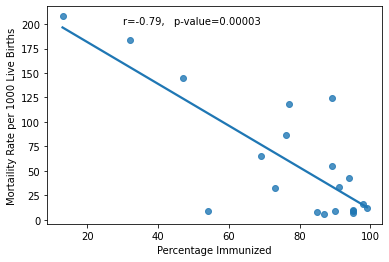

In [142]:
ax=sns.regplot("Percentage Immunized","Mortaility Rate per 1000 Live Births",data=DPT,ci=None)
ax.annotate(text='r=-0.79,   p-value=0.00003',xy=(30,200),xycoords='data')

This look non-normal, so a Spearmans correlation coefficient will be better

In [143]:
stats.spearmanr(DPT["Percentage Immunized"],DPT["Mortaility Rate per 1000 Live Births"])

SpearmanrResult(correlation=-0.5431912872313336, pvalue=0.013319032908223387)

# Plotting Correaltion Matrix and Heatmaps